In [1]:
import numpy as np
import pandas as pd
import xarray
from matplotlib import pyplot as plt
plt.style.use('seaborn-darkgrid')
data=pd.read_excel('filtered_data (2).xlsx')
# print(len(~np.nan(data['pH'])))

/opt/anaconda3/lib/python3.7/site-packages/openpyxl/worksheet/_reader.py:296: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [2]:

# Import PyCO2SYS
import PyCO2SYS as pyco2

kwargs = dict(
    par1 = data['Alk_trans1'],
    par1_type = 1, #alkalinity
    par2 = data['DIC_trans1'],
    par2_type = 2 #DIC
)

# Run PyCO2SYS
results = pyco2.sys(**kwargs)
pH_calc = np.array(results['pH'])
# print(pH)

In [3]:
#calculate d13C_pred

T=25    #degree C
S=0    #PSS
TK = T + 273.15 
DIC=np.array(data['DIC_trans'])

K1 = 10**(-(3633.86/TK - 61.2172 + 9.67770 * np.log(TK)- 0.011555*S + 0.0001152 * S**2))
K2 = 10**(-(471.78/TK + 25.9290 - 3.16967 * np.log(TK) - 0.01781*S + 0.0001122 * S**2))


H=10**(-pH_calc)  

HCO_3 = DIC/(1 + H/K1 + K2/H)
CO_3 = DIC/(1 + H/K2 + H*H/(K1*K2))
CO2 = DIC/(1 + K1/H + K1*K2/(H*H))
CO2aq=-9
CO3=-2
HCO3=0
d13C_DIC_pred = (CO2/DIC)*CO2aq + (CO_3/DIC)*CO3 + (HCO_3/DIC)*HCO3
# print(d13C_DIC_pred)

In [4]:
#make purple d13C_DIC equil line

T=25    #degree C
S=0    #PSS
DIC=2100 #micromol/kg
K1 = 10**(-(3633.86/TK - 61.2172 + 9.67770 * np.log(TK)- 0.011555*S + 0.0001152 * S**2))
K2 = 10**(-(471.78/TK + 25.9290 - 3.16967 * np.log(TK) - 0.01781*S + 0.0001122 * S**2))
    
pH = np.arange(4,11,.1)
H=10**(-pH)  

HCO_3 = DIC/(1 + H/K1 + K2/H)
CO_3 = DIC/(1 + H/K2 + H*H/(K1*K2))
CO2 = DIC/(1 + K1/H + K1*K2/(H*H))
CO2aq=-9
CO3=-2
HCO3=0
d13C_DIC = (CO2/DIC)*CO2aq + (CO_3/DIC)*CO3 + (HCO_3/DIC)*HCO3

# print('d13C of DIC = ',d13C_DIC)

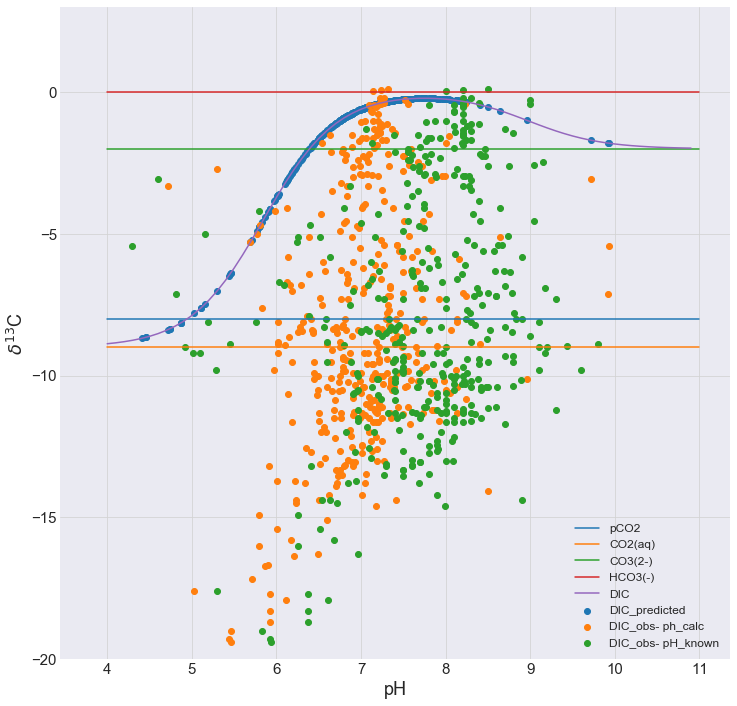

In [5]:
#data set with only measured DIC and Alk values for 500+ d13C measurements- 75% or so also have pH measurements

pCO2=(-8,-8)
CO2aq=(-9,-9)
CO3=(-2,-2)
HCO3=(0,0)
ph=(4,11)


plt.figure(figsize=(12,12))
plt.plot(ph,pCO2,label='$_pCO_2$')
plt.plot(ph,CO2aq, label='$CO_2$$_{(aq)}$')
plt.plot(ph,CO3, label='$CO_3$$^2$$^-$')
plt.plot(ph,HCO3, label='$HCO_3$$^-$')
plt.plot(pH,d13C_DIC,label='DIC')
plt.scatter(pH_calc,d13C_DIC_pred,label='DIC_predicted')
plt.scatter(pH_calc,data['d13C_DIC'],label='DIC_obs- ph_calc')
plt.scatter(data['pH'],data['d13C_DIC'],label='DIC_obs- pH_known')


plt.xlabel('pH',fontsize=18)
plt.ylabel('$\delta^{13}$C',fontsize=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid(color='lightgrey')
plt.ylim(-20,3)
plt.legend(loc='best',fontsize='large',frameon=False)

tmp_data=np.array(pH_calc)
data['pH_calc']=tmp_data.astype(float)

to_export=pd.DataFrame(data)

to_export.to_excel('rivers_only_pH_calc.xlsx')

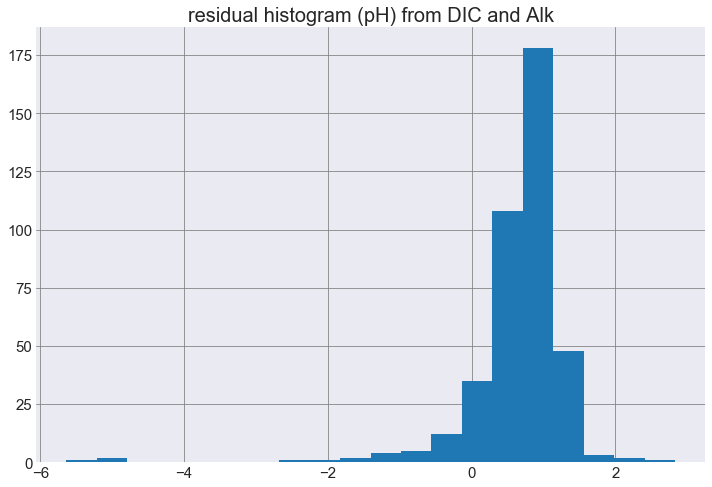

In [6]:
res = data['pH']-pH_calc
plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(12,8))
plt.hist(res,bins=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
# plt.ylabel('',fontsize=18)
plt.title('residual histogram (pH) from DIC and Alk', fontsize=20)
plt.grid(color='grey')

In [7]:
data2=pd.read_excel('filtered_ph.xlsx')
# Import PyCO2SYS
import PyCO2SYS as pyco2

kwargs = dict(
    par1 = data2['Alk_trans'],
    par1_type = 1, #alkalinity
    par2 = data2['DIC_trans'],
    par2_type = 2 #DIC
)

# Run PyCO2SYS
results2 = pyco2.sys(**kwargs)
pH_calc2 = np.array(results2['pH'])
# print(pH)

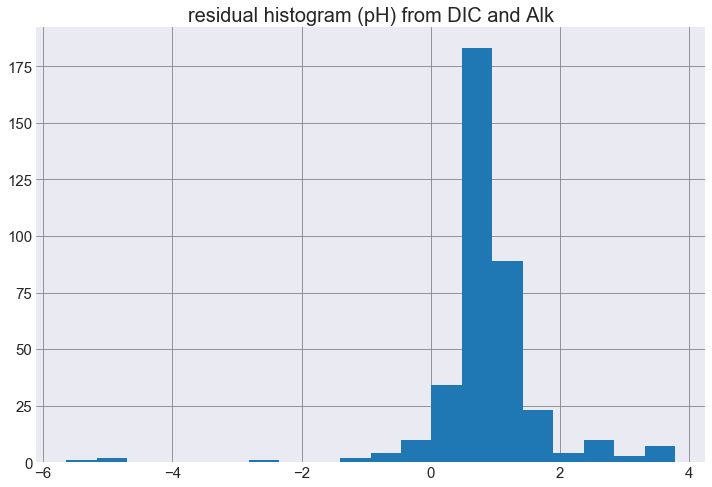

In [78]:
r = data2['pH']-pH_calc2
plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(12,8))
plt.hist(r,bins=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
# plt.ylabel('',fontsize=18)
plt.title('residual histogram (pH) from DIC and Alk', fontsize=20)
plt.grid(color='grey')

In [85]:
T=25    #degree C
S=35    #PSS
TK = T + 273.15 
DIC=np.array(data2['DIC_trans'])

K1 = 10**(-(3633.86/TK - 61.2172 + 9.67770 * np.log(TK)- 0.011555*S + 0.0001152 * S**2))
K2 = 10**(-(471.78/TK + 25.9290 - 3.16967 * np.log(TK) - 0.01781*S + 0.0001122 * S**2))


H=10**(-pH_calc2)  

HCO_3 = DIC/(1 + H/K1 + K2/H)
CO_3 = DIC/(1 + H/K2 + H*H/(K1*K2))
CO2 = DIC/(1 + K1/H + K1*K2/(H*H))
CO2aq=-9
CO3=-2
HCO3=0
d13C_DIC_pred2 = (CO2/DIC)*CO2aq + (CO_3/DIC)*CO3 + (HCO_3/DIC)*HCO3

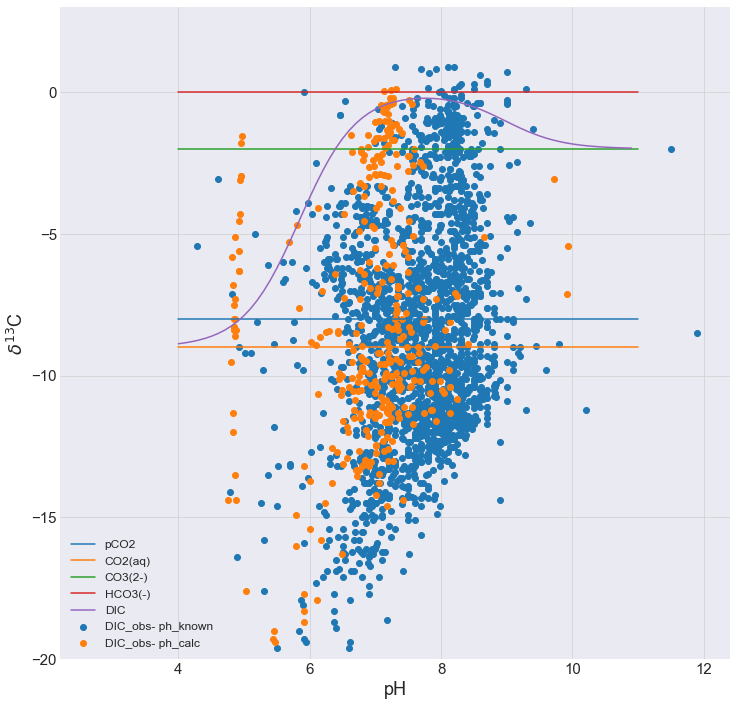

In [87]:
#data set where pH is known for 2k d13C values, but only 500 points have DIC and Alk measurements to calculate pH

pCO2=(-8,-8)
CO2aq=(-9,-9)
CO3=(-2,-2)
HCO3=(0,0)
ph=(4,11)


plt.figure(figsize=(12,12))
plt.plot(ph,pCO2,label='$_pCO_2$')
plt.plot(ph,CO2aq, label='$CO_2$$_{(aq)}$')
plt.plot(ph,CO3, label='$CO_3$$^2$$^-$')
plt.plot(ph,HCO3, label='$HCO_3$$^-$')
plt.plot(pH,d13C_DIC,label='DIC')
# plt.scatter(pH_calc,d13C_DIC_pred,label='DIC_predicted')
# plt.scatter(pH_calc2,d13C_DIC_pred2,label='DIC_predicted2')
plt.scatter(data2['pH'],data2['d13C_DIC'],label='DIC_obs- ph_known')
plt.scatter(pH_calc2,data2['d13C_DIC'],label='DIC_obs- ph_calc')


plt.xlabel('pH',fontsize=18)
plt.ylabel('$\delta^{13}$C',fontsize=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid(color='lightgrey')
plt.ylim(-20,3)
plt.legend(loc='best',fontsize='large',frameon=False)

In [ ]:
# d13C_calc using pH known as input value.

In [ ]:
#make purple line using pyco2 sys and compare to my purple line....
# feed range of ph and one given DIC value.
